# Empathy Analysis

### Problem Statement:
#### You are working for a non-profit that is recruiting student volunteers to help with Alzheimer’s patients. You have been tasked with predicting how suitable a person is for this task by predicting how empathetic he or she is. Using the Young People Survey dataset(https://www.kaggle.com/miroslavsabo/young-people-survey/), predict a person’s “empathy” on a scale from 1 to 5. 


First of all, let us visualize the data to get an idea of what we are dealing with. For that I used the tool Orange3 based on Python and C++ offered by Anaconda environment.
Here, we have used visual representation called circular FreeViz[1] where yellow points represent most likely to pay more for healthy food while blue represent least likely. The radial setting (the circle under the data) has been set so that we can view those attributes(arrows called anchors) that are comparitively larger than other unit vectors which implies that they are more informative perhaps than the others.
<img src = "files/images/OptimizedFreeviz.png"></img>
As we can see, the data is not easily separable. Few of the reasons could be that it is using all features including those which are not good at indicating chances for our target feature i.e. Empathy.
Also, according to the anchors, we might say that the attributes like gender and life struggles are useful in telling more information.<br>
We can now start working with the dataset for prediction.

First let us import all the essential packages and functions that have been consolidated in the file called 'BasicTries.py'

Return object with labels on given axis omitted where alternately any or all of the data are missing

In [26]:
from BasicTries import getCleanedData, train_validate_test_split, getXY, saveFile, loadFile, assignRadnomValue
from ParameterTuning import tuneSVC, tuneDCT, tuneRFC

import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Lasso
from scipy import stats
import warnings
from sklearn.feature_selection import RFECV
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pickle

print('...done importing!')

...done importing!


Now, we need to begin with cleaning and preprocessing the data to make it ready for training.<br>
The two things that need handling are:
1. <b>Missing Data</b> : We are replacing any or all of the data that's missing by the mode i.e. most frequent value of that column.
2. <b>Categorical Data</b>: most of the classifiers need numerical data to train on. Hence, we create <i>dummy</i> features for all the categorical attributes such as <i>Gender, Punctuality, Internet Usage</i> etc. These dummy features are based on each category and whether a particular person belongs to that category or not is marked by <b>1 or 0</b>, respectively.

After cleaning, we divide our dataset into three parts where <b>60% of data is training set, 20% is validation set and rest is testing set</b>.

In [12]:
cleanedData, finalAttr = getCleanedData()
print('\nFew dummy variables created:',finalAttr[-10:-2],'\n')
train, validate, test = train_validate_test_split(cleanedData)
X_train, y_train = getXY(train, finalAttr)
X_val, y_val = getXY(validate, finalAttr)
X_test, y_test = getXY(test, finalAttr)

  converting categorical features to indicator features...

Few dummy variables created: ['Education_doctorate degree', 'Education_masters degree', 'Education_primary school', 'Education_secondary school', 'Only child_no', 'Only child_yes', 'Village - town_city', 'Village - town_village'] 



Our data is ready for learning experiments; We try some <b>baseline and simple default classifiers</b> to see how they perform. We'll be testing out everything on validation set to improve our model for unseen test data.

First, let us see that how accurate it would be if we just assign the <b>most frequent class</b> in the training data.
As we see below, it performs pretty terribly with an <b>accuracy of 15 - 20%</b> approximately on validation data.

In [14]:
print('\n  assigning *Most frequent value* of the training data...')
print('     testing on validation set...') 
print('       accuracy on validation set:',np.mean(stats.mode(y_train) == y_val))


  assigning *Most frequent value* of the training data...
     testing on validation set...
       accuracy on validation set: 0.15841584158415842


Next, let us see how accurate it would be if we assign a <b>random class</b> as prediction.
As we see below, it performs almost equally bad with an <b>accuracy of 15% to 17%</b> approximately on validation data.

In [15]:
print('\n  assigning *Random value*...')
print('     testing on validation set...') 
print('       accuracy on validation set:',np.mean(y_val == assignRadnomValue(len(y_val))))


  assigning *Random value*...
     testing on validation set...
       accuracy on validation set: 0.16174884815214194


Now, let us train a <b>default Decision Tree Classifier</b> on the training data and see how well it performs.
As we see below, it performs better than the first two methods with an <b>accuracy of 24%</b> approximately on validation data, but it is still a <i>bad classifier</i>.

In [16]:
print('\n  training *Decision Tree* model on train set...')
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print('     testing on validation set...') 
predicted = clf.predict(X_val)
print('       accuracy on validation set:',np.mean(predicted == y_val))


  training *Decision Tree* model on train set...
     testing on validation set...
       accuracy on validation set: 0.24833349671600824


Now, let us train a <b>default Support Vector Machine</b> on the training data.
As we see below, it performs better than the default Decision Tree with an <b>accuracy of 25%</b> approximately on validation data, but is still a weaker classifier.

In [18]:
print('\n  training *Support Vector Machine* model on train set...')
clf = SVC(kernel = 'poly')
warnings.filterwarnings("ignore")
clf = clf.fit(X_train, y_train)
print('     testing on validation set...') 
predicted = clf.predict(X_val)
print('       accuracy on validation set:',np.mean(predicted == y_val))


  training *Support Vector Machine* model on train set...
     testing on validation set...
       accuracy on validation set: 0.25254876972845797


Let us also train a simple linear model, a <b>default Logistic Regression</b> model on the training data and see how well it performs.
As we see below, it performs <b>similar to the SVM and Decision Tree models</b> with an <b>accuracy of 25%</b> approximately on validation data, which is better than assigning <i>frequent values or being random</i>.

In [19]:
print('\n  training *Logistic Regression* model on train set...')
clf = LogisticRegression().fit(X_train, y_train)
print('     testing on validation set...') 
predicted = clf.predict(X_val)
print('       accuracy on validation set:',np.mean(predicted == y_val))


  training *Logistic Regression* model on train set...
     testing on validation set...
       accuracy on validation set: 0.2588716792471326


As we had seen during visualiztion and also noticed indirectly due to bad performances by the default models, there are probably a lot of redundant features which are adversely affecting the classification results. Let us try to do some feature selection using a technique called <b>Recursive Feature Elimination with Cross Validation(RFECV)</b>[2]. This technique recursively eliminated a feature and trains on the data till all the features exhaust and gives us rank according to the best performance(1 is the best) measured by cross validation.

Here, I have used RFE from sklearn package and chosen all those attributes that <u>fall in rank 1 to 3</u>. After that I rerun the default logistic regression on the new X set to see if it changes anything.

In [22]:
logreg = LogisticRegression()
rfe = RFECV(logreg, 10)
rfe = rfe.fit(X, y )
ranking = rfe.ranking_
selectedAttr = []
for i, rank in enumerate(ranking):
    if rank < 3 or i == 92:
        selectedAttr.append(finalAttr[i])

print('After feature selection:',X_train.shape)

print('\n  training *Logistic Regression* model on REFINED training set...')
clf = LogisticRegression().fit(X_train, y_train)
print('     testing on REFINED validation set...') 
predicted = clf.predict(X_val)
print('       accuracy on validation set:',np.mean(predicted == y_val))

print('\n  training *Support Vector Machine* model on REFINED training set...')
clf = SVC(kernel = 'poly')
warnings.filterwarnings("ignore")
clf = clf.fit(X_train, y_train)
print('     testing on REFINED validation set...') 
predicted = clf.predict(X_val)
print('       accuracy on validation set:',np.mean(predicted == y_val))

After feature selection: (606, 40)

  training *Logistic Regression* model on REFINED training set...
     testing on REFINED validation set...
       accuracy on validation set: 0.2658317811979218

  training *Support Vector Machine* model on REFINED training set...
     testing on REFINED validation set...
       accuracy on validation set: 0.25051465542593865


As we see in above output, the performance has slightly <b>improved by 1%</b> for Logistic Regression reaching from around <u>25% to 26% accuracy</u> comparable to SVM.
Although, when we use the same refined dataset with SVM, it doesn't really improve the performance by much.
Hence, it might be possible that both of these classifiers are learning a different story from the data. This suggests that may be we should try to combine results from multiple classifiers instead of just one which gives us a hint for usage of ensemble techniques.

But before that, we will try to make the base classifiers work at their optimum for the data by <i>tuning the respective hyperparameters</i>.

To tune the hyperparameters, we make use of <b>Grid Search with cross validation</b> offered by sklearn as GridSearchCV[3].

GridSearchCV takes an estimator i.e. your model whose parameters we need to tune, a parameter grid in which we mention the hyperparameters of the respective model we wish to tune as well as all the possible values we want to test. Let us see an example for the tuning <u>Decision Tree Classifier</u>.

In [ ]:
def tuneDCT(X, y):
    param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth':list(range(1, 10, 1))
    }

Here, we see the parameter grid we need to tune for our estimator Decision Tree Classifier. We have taken three hyperparameters that we wish to tune:
1. <b>criterion</b> which decides the split. It can have either gini or entropy as its possible values so, we put both of them in a list to try.<br>
2. <b>max_features</b> which gives the number of features to consider for best split. The already offered methods are auto, square root or natural log of the number of features that needs to be considered. So, we include all of them in the list to test out.<br>
3. <b>max_depth</b> which is the depth of the generated decision tree. We try all the values in range 1 to 10 for it.<br><br>
Similarly, a script for ParameterTuning has been created to find the best features for SVM classifier, RandomForest Classifier as well. 

To figure out the numerical range that will suit the model, we can try big ranges of multiples of 10 and step down to 1 while reducing the range. For example, to figure out the range of RFC's n_estimators, I first tested for a range of 100 to 1000 with a step of 10. The value that I got was 700 and so, I tried again with a range of 500, 900 with a step of 5 for which I got a value of 650. This lead to the current range I am testing i.e. 648 to 658 with a step of 1.

We'll see the selected parameters for their respective models below.

In [24]:
bestSVC = tuneSVC(X_train,y_train)
print('Best parameter settings for:\nSVC:',bestSVC)
bestRFC = tuneRFC(X_train,y_train)
print('RFC:',bestRFC)
bestDCT = tuneDCT(X_train,y_train)
print('DCT:',bestDCT)

Best parameter settings for:
SVC: {'C': 1, 'kernel': 'poly'}
RFC: {'max_features': 'log2', 'n_estimators': 663}
DCT: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2'}


Now that we have best parameter settings for each classifier, we can consider ensemble techniques on them.

The first thing that we would want is that the model we use are stable in nature which can be done by Bootstrap aggregating aka bagging that improves the stability and accuracy of base classifier by model averaging. We can apply that to each of the classifiers to make them stable. sklearn library offers BaggingClassifier[4] that can be used by us.

To predict based on all the models combined, we can have a voting model which takes in vote from every model and gives us a unanimous prediction. This can help us in getting the best of all and also the prediction will be more certain.

This can be achieved by sklearn's Voting Classifier[5]. We'll be doing hard voting which gives us the voted prediciton classes whereas soft voting gives voted probabilities.

Now, let us see how bagging and voting our classifiers work on our validation data.

In [35]:
bestSVC = loadFile('bestSVC' )
bestRFC = loadFile('bestRFC' )
bestDCT = loadFile('bestDCT' )

clf1 = LogisticRegression(random_state=1)

rfc = RandomForestClassifier(n_jobs=-1, max_features= bestRFC['max_features'], n_estimators= bestRFC['n_estimators'], oob_score = True) #
clf2 = BaggingClassifier(base_estimator=rfc)

cart = tree.DecisionTreeClassifier(criterion = bestDCT['criterion'], max_depth=bestDCT['max_depth'], max_features=bestDCT['max_features'])
clf3 = BaggingClassifier(base_estimator=cart)

svc = SVC(kernel = bestSVC['kernel'], C = bestSVC['C'])
clf4 = BaggingClassifier(base_estimator=svc)


eclf = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('cart',clf3),('svm',clf4)], voting='hard')

eclf = eclf.fit(X_train, y_train)
print('accuracy on validation set:',np.mean(y_val == eclf.predict(X_val)))


accuracy on validation set: 0.2986226840505833


As you can see bagging and voting has increased the accuracy from around <b>25% for each base classifier to 29%</b>.

Now, there are other models that we'll try to see if they improve the performance:
1. <b>K Nearest Neighbors Classifier</b>[6] (a clustering algorithm)
2. <b>Multi-layer Perceptron Classifier</b>[7] (a neural network)
3. <b>Quadratic Discriminant Analysis</b>[8] (Bayes' Rule based decsion boundary)

Let us see, how they all perform on the validation set.

In [45]:
clf1 = LogisticRegression(random_state=1)

rfc = RandomForestClassifier(n_jobs=-1, max_features= bestRFC['max_features'], n_estimators= bestRFC['n_estimators'], oob_score = True) #
clf2 = BaggingClassifier(base_estimator=rfc)

cart = tree.DecisionTreeClassifier(criterion = bestDCT['criterion'], max_depth=bestDCT['max_depth'], max_features=bestDCT['max_features'])
clf3 = BaggingClassifier(base_estimator=cart)

rfc = SVC(kernel = bestSVC['kernel'], C = bestSVC['C'])
clf4 = BaggingClassifier(base_estimator=rfc)

kmeans = KNeighborsClassifier(3)

nn = MLPClassifier(alpha=1)

qda = QuadraticDiscriminantAnalysis()


eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('cart',clf3),('svm',clf4), ('nn', nn)], voting='hard')

eclf1 = eclf1.fit(X_train, y_train)
print('accuracy on validation set:',np.mean(y_val == eclf1.predict(X_val)))

accuracy on validation set: 0.30462699735320065


We can see that after adding all the new classifiers, our model <u>increased the accuracy by 1%</u>.

Now, we can test our model (saved as pickle file for saving time) on the test data. We'll use both training and validation data to train the model for testing data.

In [44]:
eclf1 = pickle.load(open('ensemble.sav', 'rb'))

eclf1 = eclf1.fit(np.concatenate((X_train,X_val)),np.concatenate((y_train,y_val)))
print('accuracy on testing set:',np.mean(y_test == eclf1.predict(X_test)))

accuracy on testing set: 0.3026173904519165


As we see,<b> accuracy for testing data</b> is almost <u>similar to the validation</u> data i.e. <b>30%</b>.

So, to recapitulate the entire process, we first preprocessed the data by handling missing values and converting categorical features to numerical features. Then we divided our data to training, validation and testing data in ratio 60:20:20. Then we try multiple base classifiers on our training data and test and tune them on validation set. Then, we try ensemble techniques to improve the performace of our model and then finally, tested it on our test data.

Below is a bar graph for our progress based on accuracy.

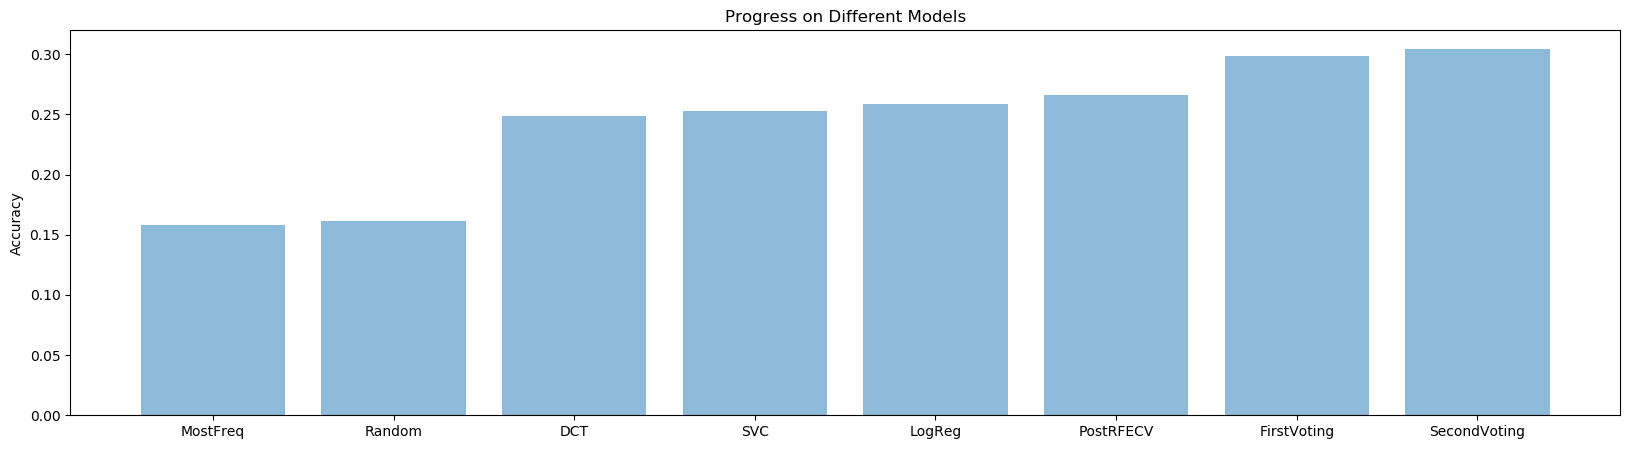

In [58]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('MostFreq', 'Random', 'DCT', 'SVC', 'LogReg', 'PostRFECV','FirstVoting', 'SecondVoting')
y_pos = np.arange(len(objects))
performance = [0.15841584158415842,0.16174884815214194,0.24833349671600824,0.25254876972845797,
               0.2588716792471326,0.2658317811979218, 0.2986226840505833,0.30462699735320065 ]
plt.figure(figsize=(20, 5))  
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Progress on Different Models')
 
plt.show()

## References:
[1] http://orange3.readthedocs.io/projects/orange-visual-programming/widgets/visualize/freeviz.html<br>
[2] http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV<br>
[3] http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html<br>
[4] http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html<br>
[5] http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html<br>
[6] http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html<br>
[7] http://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron<br>
[8] http://scikit-learn.org/stable/modules/lda_qda.html<br>